In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)
print("Libraries imported successfully")

Libraries imported successfully


In [14]:
df = pd.read_csv(("C:\\Users\\Sneha\\Desktop\\Crime Pridictive Analysis\\data\\Crime_Incidents_in_2025.csv"),encoding = "utf-8-sig")
print(df.head())

             X            Y       CCN              REPORT_DAT  \
0  400588.4650  129470.0424   5131706  2025/02/05 05:00:00+00   
1  399950.1386  130512.4788  17194618  2025/06/30 04:00:00+00   
2  406827.3300  136094.5500  22058767  2025/06/30 04:00:00+00   
3  399075.7100  128801.5400  22108667  2025/01/02 05:00:00+00   
4  396953.5100  146888.4100  25102388  2025/07/08 00:50:25+00   

               START_DATE                END_DATE  \
0  2005/09/27 07:25:00+00  2005/09/27 07:26:00+00   
1  2017/11/09 20:44:00+00  2017/11/09 22:57:34+00   
2  2022/04/28 02:21:00+00  2022/04/28 05:00:00+00   
3  2022/07/30 01:12:00+00  2022/07/30 01:13:00+00   
4  2025/07/07 11:00:00+00  2025/07/07 16:00:00+00   

                                   BLOCK       OFFENSE  METHOD     SHIFT  \
0     800 - 899 BLOCK OF XENIA STREET SE      HOMICIDE     GUN  MIDNIGHT   
1     3200 - 3299 BLOCK OF 4TH STREET SE      HOMICIDE     GUN  MIDNIGHT   
2      200 - 399 BLOCK OF 56TH STREET NE      HOMICIDE     GUN

In [25]:
# Convert REPORT_DAT to datetime
df['REPORT_DAT'] = pd.to_datetime(df['REPORT_DAT'], errors='coerce')

# Extract temporal features for EDA
df['Year'] = df['REPORT_DAT'].dt.year
df['Month'] = df['REPORT_DAT'].dt.month
df['Hour'] = df['REPORT_DAT'].dt.hour

# Verify
df[['REPORT_DAT', 'Year', 'Month', 'Hour']].head()


,REPORT_DAT,Year,Month,Hour
0,2025-02-05 05:00:00+00:00,2025,2,5
1,2025-06-30 04:00:00+00:00,2025,6,4
2,2025-06-30 04:00:00+00:00,2025,6,4
3,2025-01-02 05:00:00+00:00,2025,1,5
4,2025-07-08 00:50:25+00:00,2025,7,0


In [15]:
df.shape

(23872, 25)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23872 entries, 0 to 23871
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     23872 non-null  float64
 1   Y                     23872 non-null  float64
 2   CCN                   23872 non-null  int64  
 3   REPORT_DAT            23872 non-null  object 
 4   START_DATE            23871 non-null  object 
 5   END_DATE              22204 non-null  object 
 6   BLOCK                 23872 non-null  object 
 7   OFFENSE               23872 non-null  object 
 8   METHOD                23872 non-null  object 
 9   SHIFT                 23872 non-null  object 
 10  WARD                  23872 non-null  int64  
 11  ANC                   23872 non-null  object 
 12  DISTRICT              23840 non-null  float64
 13  PSA                   23840 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  23872 non-null  object 
 15  BLOCK_GROUP        

In [17]:
df.describe()

,X,Y,CCN,WARD,DISTRICT,PSA,CENSUS_TRACT,XBLOCK,YBLOCK,LATITUDE,LONGITUDE,OBJECTID,OCTO_RECORD_ID
count,23872.000000,23872.000000,2.387200e+04,23872.000000,23840.000000,23840.000000,23866.000000,23872.000000,23872.000000,23872.000000,23872.000000,2.387200e+04,0.0
mean,399156.001299,137969.465306,2.512601e+07,4.377807,3.648951,369.497945,7606.918545,399156.001299,137969.465306,38.909581,-77.009738,8.606493e+08,NaN
std,3021.058732,3473.886859,4.641336e+05,2.279968,1.831520,182.782251,36328.644576,3021.058732,3473.886859,0.031293,0.034834,1.098349e+05,NaN
min,390294.800000,127142.290000,5.131706e+06,1.000000,1.000000,101.000000,101.000000,390294.800000,127142.290000,38.812049,-77.111944,8.602252e+08,NaN
25%,397225.495000,136471.209850,2.505047e+07,2.000000,2.000000,207.000000,3400.000000,397225.495000,136471.209843,38.896081,-77.032005,8.605484e+08,NaN
50%,398817.030000,137862.110000,2.510120e+07,5.000000,3.000000,308.000000,7202.000000,398817.029997,137862.110000,38.908618,-77.013642,8.605817e+08,NaN
75%,400972.523700,139964.890000,2.515656e+07,6.000000,5.000000,505.000000,9201.000000,400972.523711,139964.890000,38.927562,-76.988794,8.607725e+08,NaN
max,407806.750900,147365.030000,8.927285e+07,8.000000,7.000000,708.000000,980000.000000,407806.750917,147365.030000,38.994217,-76.910012,8.608052e+08,NaN


In [18]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=np.number).columns

cat_cols, num_cols


(Index(['REPORT_DAT', 'START_DATE', 'END_DATE', 'BLOCK', 'OFFENSE', 'METHOD',
        'SHIFT', 'ANC', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP',
        'VOTING_PRECINCT', 'BID'],
       dtype='object'),
 Index(['X', 'Y', 'CCN', 'WARD', 'DISTRICT', 'PSA', 'CENSUS_TRACT', 'XBLOCK',
        'YBLOCK', 'LATITUDE', 'LONGITUDE', 'OBJECTID', 'OCTO_RECORD_ID'],
       dtype='object'))

In [19]:
df.isnull().sum().sort_values(ascending=False)

OCTO_RECORD_ID          23872
BID                     19125
END_DATE                 1668
PSA                        32
DISTRICT                   32
CENSUS_TRACT                6
BLOCK_GROUP                 6
START_DATE                  1
X                           0
METHOD                      0
OFFENSE                     0
BLOCK                       0
REPORT_DAT                  0
Y                           0
CCN                         0
ANC                         0
WARD                        0
NEIGHBORHOOD_CLUSTER        0
SHIFT                       0
XBLOCK                      0
VOTING_PRECINCT             0
YBLOCK                      0
LATITUDE                    0
LONGITUDE                   0
OBJECTID                    0
dtype: int64

In [27]:
# # Convert REPORT_DAT to datetime
# df['REPORT_DAT'] = pd.to_datetime(df['REPORT_DAT'], errors='coerce')

# # Extract Hour for visualization
# df['Hour'] = df['REPORT_DAT'].dt.hour


In [28]:
# df[['REPORT_DAT', 'Hour']].head()


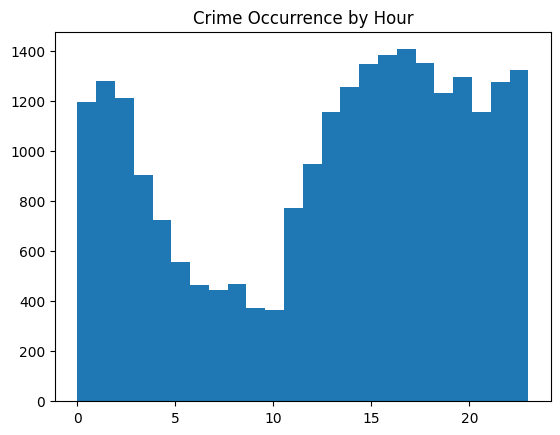

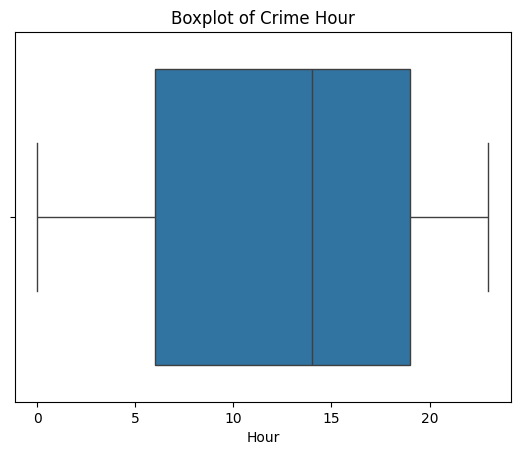

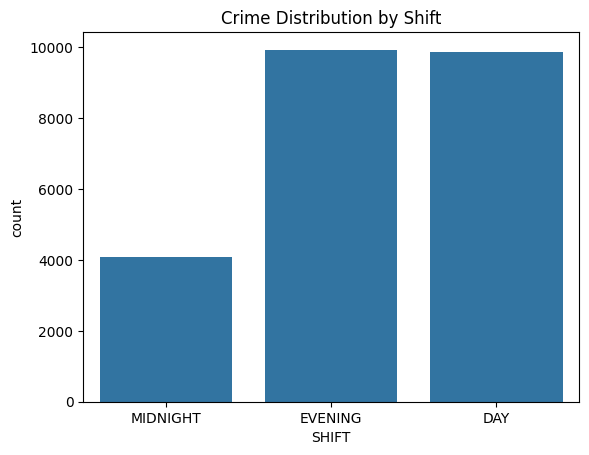

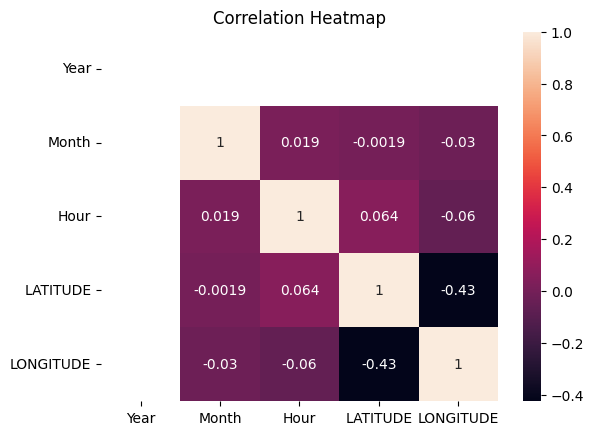

In [29]:
# Histogram
plt.hist(df['Hour'], bins=24)
plt.title("Crime Occurrence by Hour")
plt.show()

# Boxplot
sns.boxplot(x=df['Hour'])
plt.title("Boxplot of Crime Hour")
plt.show()

# Count Plot
sns.countplot(x=df['SHIFT'])
plt.title("Crime Distribution by Shift")
plt.show()

# Heatmap
corr = df[['Year','Month','Hour','LATITUDE','LONGITUDE']].corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()
